In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [3]:
archivo = "../01_data/01_PreEPW/imputed_SARIMA_0_1_1.csv"
epw = pd.read_csv(archivo,
                 index_col=0,
                 parse_dates=True)
epw.fillna(0,inplace=True)


In [4]:
epw

,Ib,Ig,To,RH,WS,WD,P,Eg
time,,,,,,,,
2018-01-01 00:00:00,0.000,0.0,18.70,36.34,1.422,316.0,87864.11,0.0
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37,0.0
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64,0.0
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21,0.0
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91,0.0
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32,0.0
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70,0.0
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03,0.0


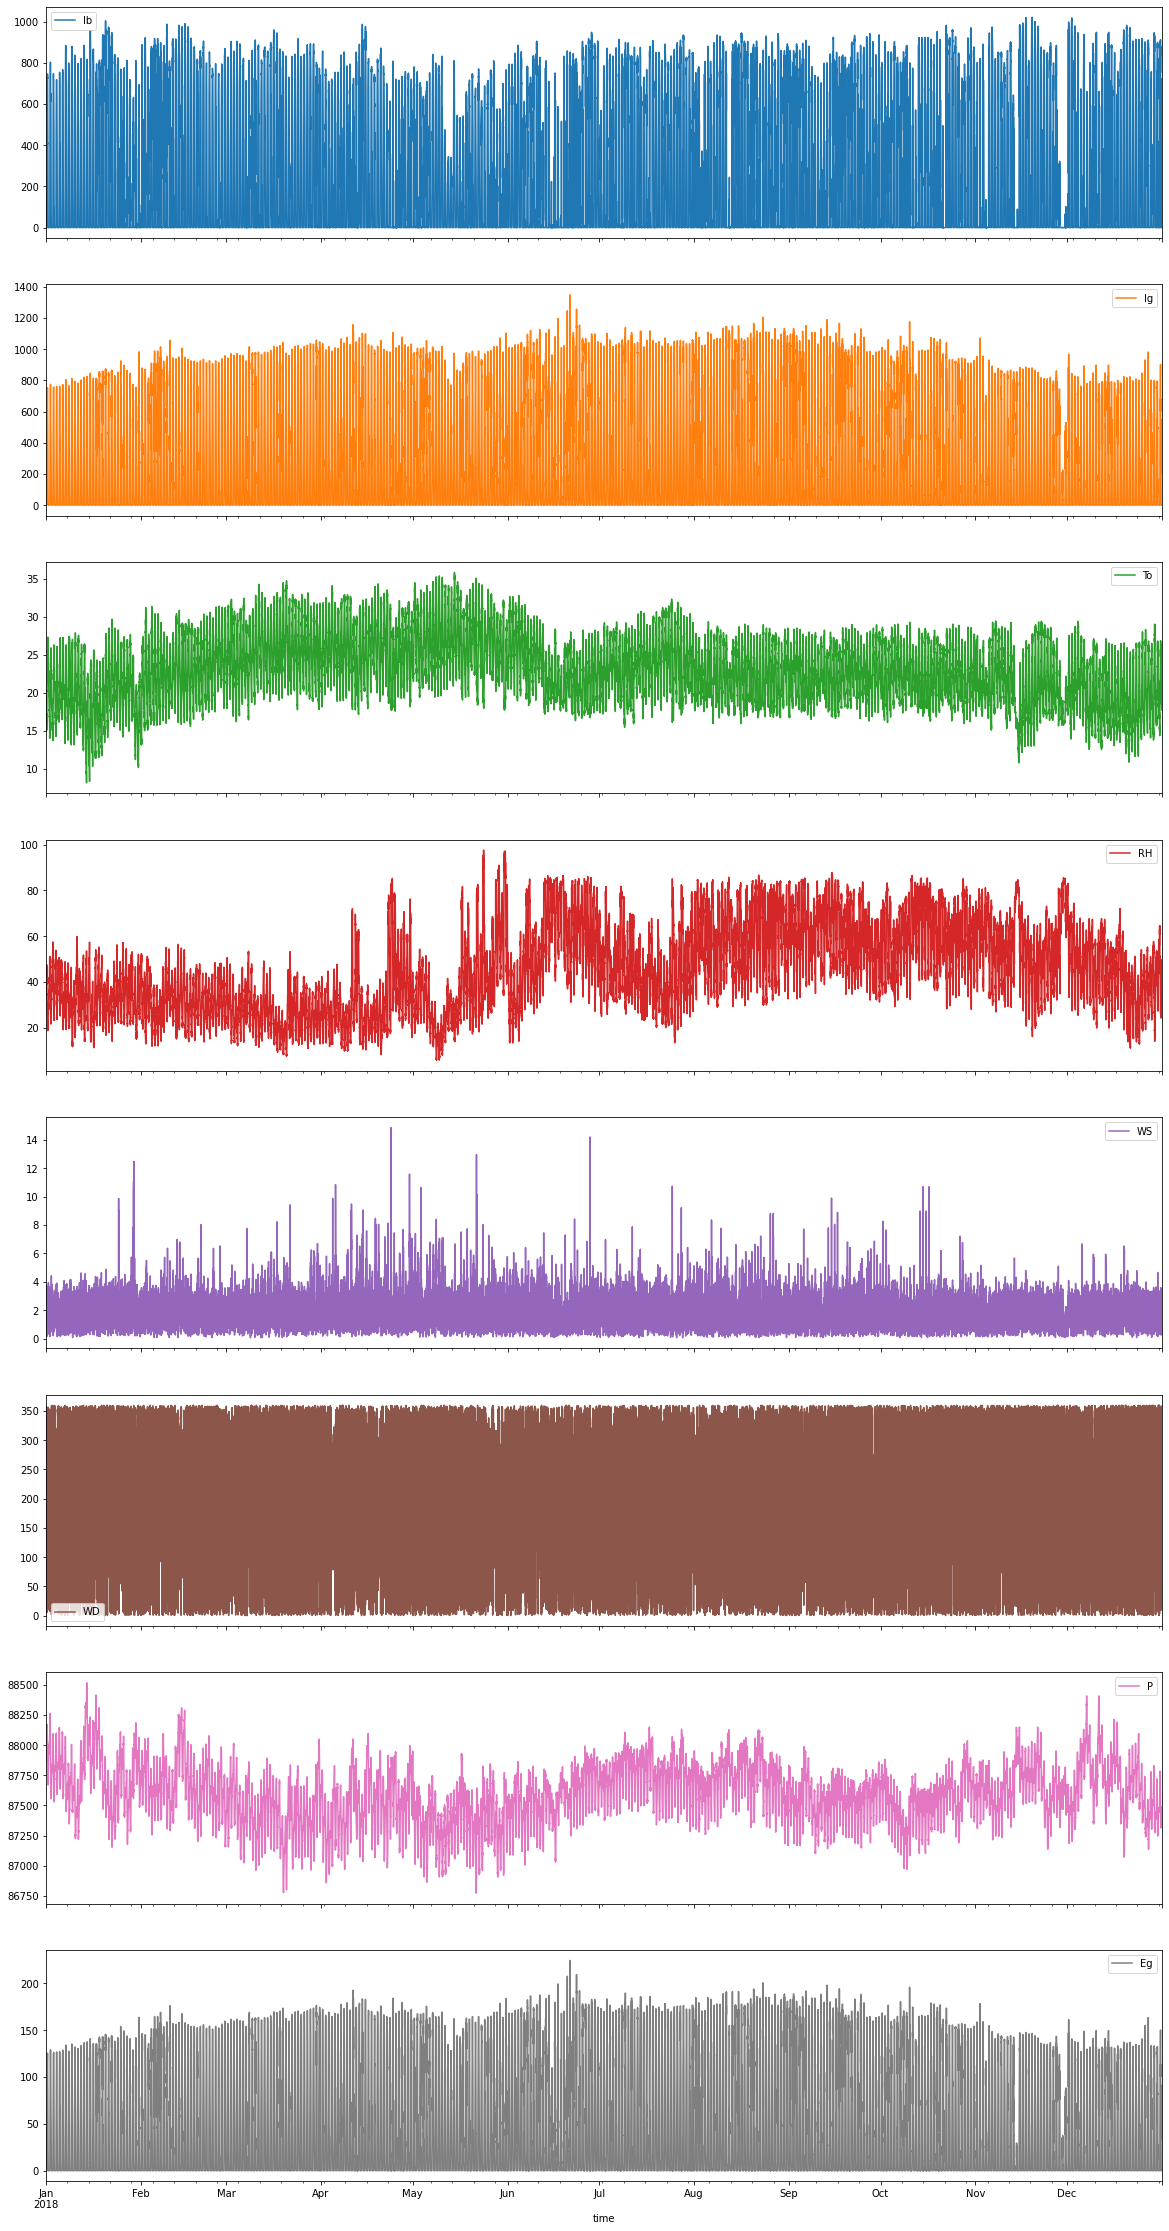

In [5]:
epw.plot(subplots=True,figsize=(20,40));

In [11]:
def df2epw(df):
    df['anio']    = df.index.year
    df['mes']     = df.index.month
    df['dia']     = df.index.day
    df['hora']    = df.index.hour
    df['minutos'] = df.index.minute
    return df[1:]

In [12]:

columnas = ['anio','mes','dia','hora','minutos',
            'To','RH','P',"Ig","Ib",'WD','WS']
tmp = df2epw(epw)

tmp.to_csv( "../01_data/03_toEPWs/Temixco_2018_imputado_SARIMA_0_1_1.csv",
           columns=columnas,header=False,index=False)


In [8]:
tmp

,Ib,Ig,To,RH,WS,WD,P,Eg,anio,mes,dia,hora,minutos
time,,,,,,,,,,,,,
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.700,87876.37,0.0,2018,1,1,0,10
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.000,87888.64,0.0,2018,1,1,0,20
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.500,87887.21,0.0,2018,1,1,0,30
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.000,87886.91,0.0,2018,1,1,0,40
2018-01-01 00:50:00,0.031,0.0,19.23,35.40,1.468,6.668,87889.36,0.0,2018,1,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.200,87484.32,0.0,2018,12,31,23,10
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.500,87470.70,0.0,2018,12,31,23,20
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.700,87455.03,0.0,2018,12,31,23,30


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

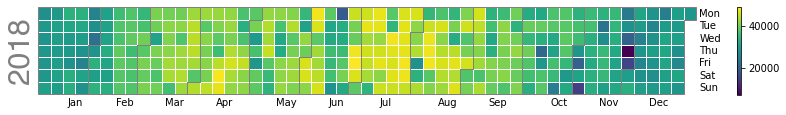

In [9]:
import calplot
calplot.calplot(tmp.Ig)

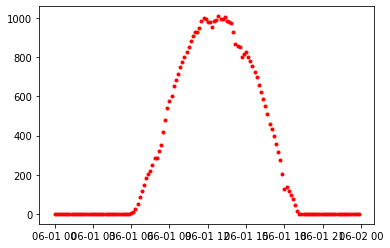

In [10]:
plt.plot(tmp.Ig.loc['2018-06-01'],'r.')

In [20]:
# auxiliary programs > weather converter